In [1]:
#Below loads all the preliminaries for the analysis.

#historic crypto package for cryptodata
from Historic_Crypto import HistoricalData
from Historic_Crypto import Cryptocurrencies
from Historic_Crypto import LiveCryptoData

from warnings import simplefilter

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
"""
#find GBP cryptocurrency ticks
data = Cryptocurrencies(coin_search = 'GBP', extended_output=False).find_crypto_pairs() 
print(data)
"""

"\n#find GBP cryptocurrency ticks\ndata = Cryptocurrencies(coin_search = 'GBP', extended_output=False).find_crypto_pairs() \nprint(data)\n"

In [3]:
etherium = pd.read_csv('D:\Documents\data.csv', index_col=0, parse_dates=['time'])

In [4]:
#etherium = etherium[457000:852571]

In [5]:
ts = etherium['close']

In [6]:
#testing close prices for stationarity

"""
x = etherium['close'].values
result = adfuller(x, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
"""

"\nx = etherium['close'].values\nresult = adfuller(x, autolag='AIC')\nprint('ADF Statistic: %f' % result[0])\nprint('p-value: %f' % result[1])\nprint('Critical Values:')\nfor key, value in result[4].items():\n\tprint('\t%s: %.3f' % (key, value))\n"

In [7]:
ts.describe()

count     371.000000
mean     1098.925418
std       954.827180
min       220.760000
25%       371.480000
50%       585.110000
75%      1780.795000
max      4179.760000
Name: close, dtype: float64

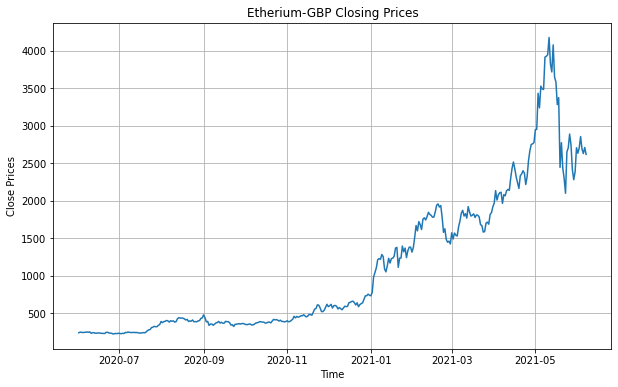

In [8]:
#line graph of closing price, shows seasonality/trend 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Close Prices')
plt.plot(ts)
plt.title('Etherium-GBP Closing Prices')
plt.show()


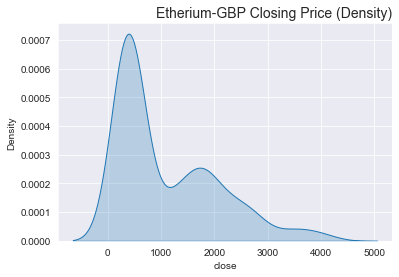

In [9]:
#Density shows positive skewness 
sns.set_style('darkgrid')
sns.kdeplot(etherium['close'], shade=True)
plt.title('Etherium-GBP Closing Price (Density)', loc = 'right', fontsize=14)

plt.show()

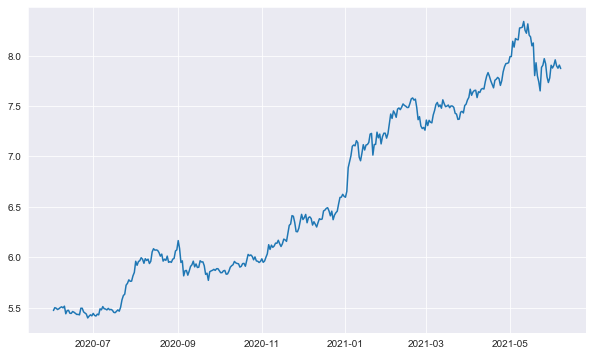

In [10]:
#reducing trend using log transformation
ts_log = np.log(ts)

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log)

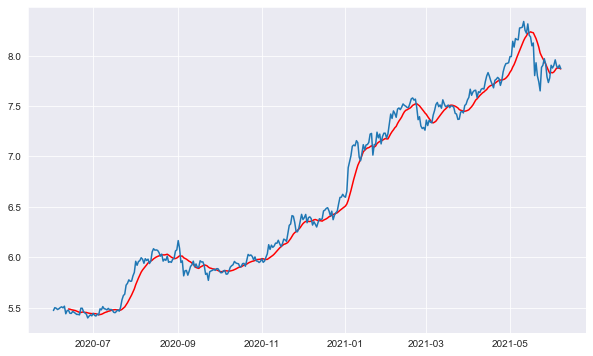

In [11]:
moving_avg = ts_log.rolling(12).mean()

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(moving_avg, color='red')
plt.plot(ts_log)

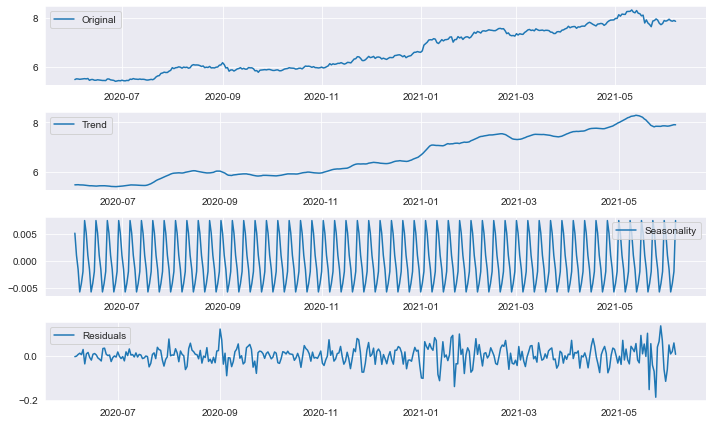

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,6))
plt.grid(True)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

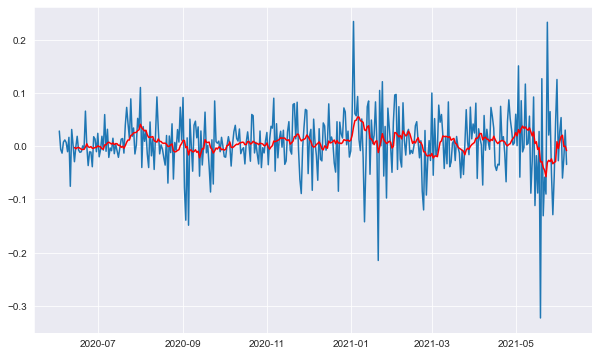

In [13]:
#Differencing
ts_log_diff = ts_log.diff()
moving_avg = ts_log_diff.rolling(12).mean()

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log_diff)
plt.plot(moving_avg, color='red')
plt.show()


In [14]:
#ADF Test
#THIS DATASET IS STATIONARY WITH X AMOUNT OF CONFIDENCE

X = ts_log_diff
X.dropna(inplace=True)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.949502
p-value: 0.000000
	1%: -3.449
	5%: -2.870
	10%: -2.571


C:\Users\lucap\miniconda3\envs\Jupyterlab\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\lucap\miniconda3\envs\Jupyterlab\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was pro

Text(0.5, 1.0, 'RSS: 1.0661')

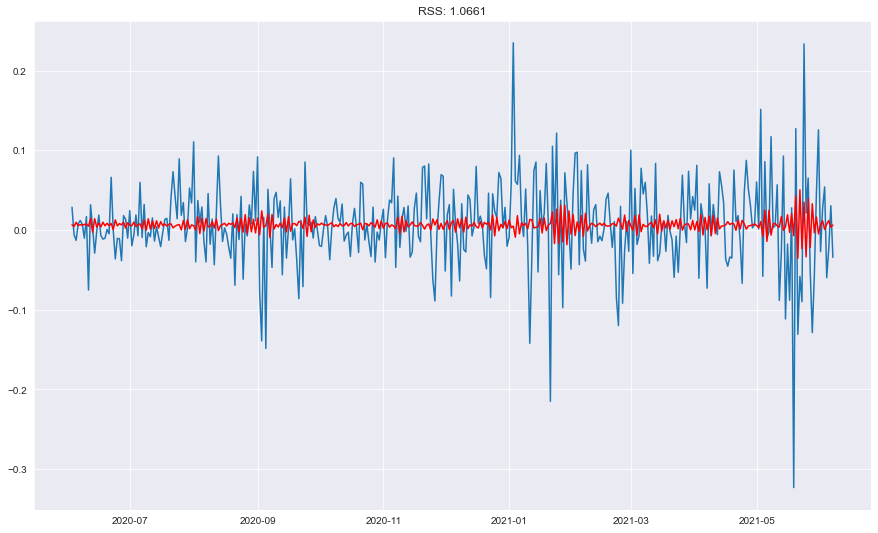

In [15]:
model = ARIMA(ts_log, order=(2, 1, 1))  #change these orders LOOK FOR RSS
results_AR = model.fit(disp=-1) 

plt.figure(figsize=(15,9))
plt.grid(True)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

C:\Users\lucap\miniconda3\envs\Jupyterlab\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\lucap\miniconda3\envs\Jupyterlab\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0744')

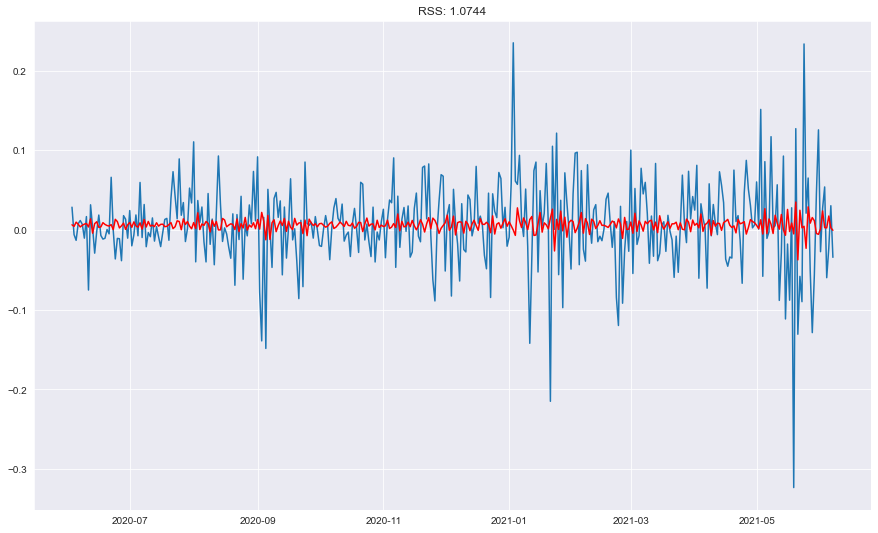

In [16]:
model = ARIMA(ts_log, order=(0, 1, 2))  #change these orders look for RSS
results_MA = model.fit(disp=-1)

plt.figure(figsize=(15,9))
plt.grid(True)
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

C:\Users\lucap\miniconda3\envs\Jupyterlab\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\lucap\miniconda3\envs\Jupyterlab\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\lucap\miniconda3\envs\Jupyterlab\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import w

Text(0.5, 1.0, 'RSS: 1.0659')

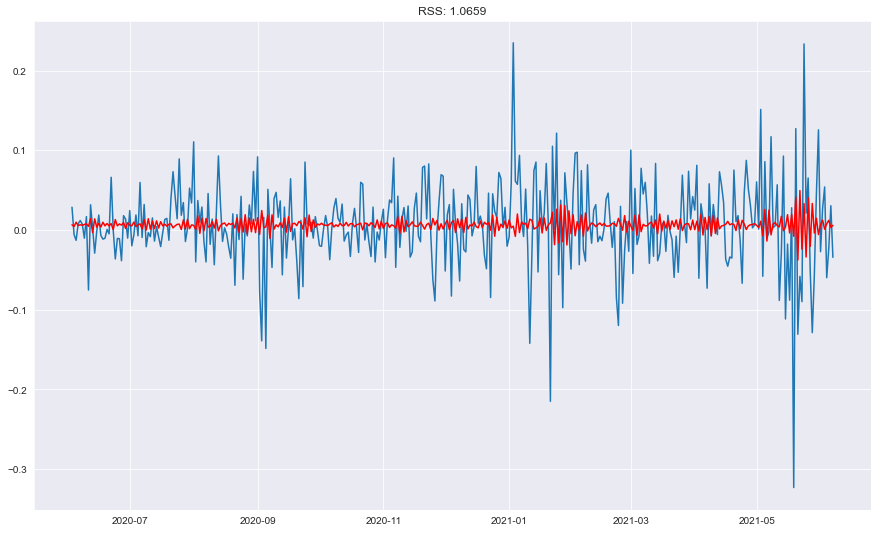

In [17]:
model = ARIMA(ts_log, order=(2, 1, 2))  #change these orders look for RSS
results_ARIMA = model.fit(disp=-1)

plt.figure(figsize=(15,9))
plt.grid(True)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [18]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

time
2020-06-03    0.006489
2020-06-04    0.004350
2020-06-05    0.009731
2020-06-06    0.005567
2020-06-07    0.006458
dtype: float64


In [19]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

time
2020-06-03    0.006489
2020-06-04    0.010839
2020-06-05    0.020569
2020-06-06    0.026136
2020-06-07    0.032594
dtype: float64


time
2020-06-02    5.471051
2020-06-03    5.477541
2020-06-04    5.481890
2020-06-05    5.491621
2020-06-06    5.497188
dtype: float64

Text(0.5, 1.0, 'RMSE: 403.6232')

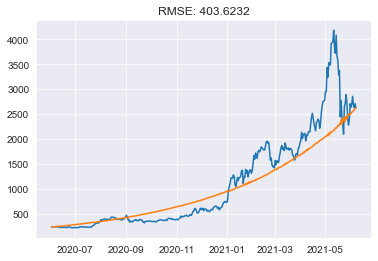

In [20]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [21]:
#Dickey-Fuller TEST

"""
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    roll_avg = ts_log_diff.rolling(12).mean()
    roll_std = ts_log_diff.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(roll_avg, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

ts_log_diff.dropna(inplace=True)

test_stationarity(ts_log_diff)
"""

"\ndef test_stationarity(timeseries):\n    \n    #Determing rolling statistics\n    roll_avg = ts_log_diff.rolling(12).mean()\n    roll_std = ts_log_diff.rolling(12).std()\n\n    #Plot rolling statistics:\n    orig = plt.plot(timeseries, color='blue',label='Original')\n    mean = plt.plot(roll_avg, color='red', label='Rolling Mean')\n    std = plt.plot(roll_std, color='black', label = 'Rolling Std')\n    plt.legend(loc='best')\n    plt.title('Rolling Mean & Standard Deviation')\n    plt.show(block=False)\n    \n    #Perform Dickey-Fuller test:\n    print ('Results of Dickey-Fuller Test:')\n    dftest = adfuller(timeseries, autolag='AIC')\n    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])\n    for key,value in dftest[4].items():\n        dfoutput['Critical Value (%s)'%key] = value\n    print (dfoutput)\n\nts_log_diff.dropna(inplace=True)\n\ntest_stationarity(ts_log_diff)\n"